# Predict Employment Termination


This project originated in Data Science Camp as a project that tests how well students are in the skills they learned during camp

In this project will go to predict employment termination based on knowledge of an employees work in the company.

## Analysis Preparation

#### In this step we import all needed libraries, we make aliases for easier calling when needed:

Pandas: a library offers data structures and operations for manipulating numerical tables and time series.

Numpy: a library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

Matplotlib: a plotting library for the Python programming language and its numerical mathematics extension NumPy

Seaborn: a data visualization library built on top of matplotlib and closely integrated with pandas data structures in Python.

Scikit-learn: a free machine learning library for Python. It features various algorithms like support vector machine, random forests, and k-neighbours, and it also supports Python numerical and scientific libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from subprocess import check_output


# this statement allows the visuals to render within your Jupyter Notebook 
%matplotlib inline 

## General Properties

In [3]:
df = pd.read_csv('EmpTerminationData.csv') # Load dataset anto a dataframe by import csv file
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


- The result of .read_csv() is a dataframe, the main data structure of pandas. Dataframes are made up of columns and rows, each of which are pandas series.

In [4]:
df.shape   #Check size of the dataset, number of rows and features

(49653, 18)

In [5]:
df.head(10) # Shows the first 10 rows of data

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
7,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
8,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


- We can find the age by calculate the difference between birth date and record date.

- We can find the experience by calculate the difference between hire date and record date.

- The termination uses 1/1/1900 as default if the employee is still active.

- An employee whose employment is terminated has valid entries for termination date, termination reason and termination type. These 3 features should not be used for training the machine learning model because the features are results, not predictors, of employment termination. They may be interesting as labels, however, if the prediction goal changes.

- The status year column repeats information in the record date.

- The status column is the label to predict. It should be converted from string to numerical.

## Exploring general properties about the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

- This shows that we have 18 columns in total besides index, and we have 49653 record.

- None of the data fields have NULL values.

- Some features with strings should be dates. These should be converted to date and time if used. The features are recorddate_key, birthdate_key, orighiredate_key, and terminationdate_key.

In [7]:
# Check Duplicates
df.duplicated().sum()

0

- There is no duplicate rows in this dataset.

In [8]:
df.isnull().sum()   #Check the number of null values for each column

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

- There is no null values in this dataset.

# Understand Nature of each field in dataset

In [9]:
df.describe()    # Get statistical data about numerical data 

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


- EmployeeID is for identification. It shouldn't be used for training the machine learning model, but can be useful for filtering rows.

- Age variate from 19 to 65 which means employees have 19 years have a high school diploma as maximum, while the employees are 65 that is regular age for retirement .

- length_of_service	variate between 0 to 26 years of experienc.

- The store_name is given as a number, even though it is a nominal categorical feature. The store name itself is unlikely to be cause of employment termination, but particular feature values may be associated with particular stores. It could be an interesting separate investigation.

- This data has been recorded from 2006 to 2015

In [10]:
df.describe(include=['O'])  # Summarise the non-numerical data

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,city_name,department_name,job_title,gender_short,gender_full,termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT
count,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653
unique,130,5342,4415,1055,40,21,47,2,2,4,3,2,2
top,12/31/2013 0:00,3/23/1973,9/25/2006,1/1/1900,Vancouver,Meats,Meat Cutter,F,Female,Not Applicable,Not Applicable,ACTIVE,STORES
freq,5215,40,50,42450,11211,10269,9984,25898,25898,48168,48168,48168,49068


- "gender", "STATUS" and "BUSINESS_UNIT" have 2 values, so the features can be converted to numerical Boolean.

- The department name and job title features have multiple unique values. There may be a way to categorise these features.

- Gender has 2 unique values "F" and "M" and the most frequent one is "F" which means data have more data on women than men.

In [11]:
df.corr()   # find the correlation among the columns.

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
EmployeeID,1.000000,-0.926278,-0.898833,-0.010321,0.198741
age,-0.926278,1.000000,0.909430,-0.004068,-0.039738
length_of_service,-0.898833,0.909430,1.000000,0.011724,0.237022
store_name,-0.010321,-0.004068,0.011724,1.000000,0.008656
STATUS_YEAR,0.198741,-0.039738,0.237022,0.008656,1.000000


- The output dataframe can be interpreted as for any cell, row variable correlation with the column variable is the value of the cell. that the correlation of a variable with itself is 1. For that reason all the diagonal values are 1

- EmployeeID has no statistical meanings that's why we need to change the datatype into string.

- Age have correlation with length_of_service because the vlaue 0.90 ~ 1. on the other hand thier is no corr between age and store_name or STATUS_YEAR

- length_of_service have weak corr with store_name and STATUS_YEAR

<Figure size 720x720 with 0 Axes>

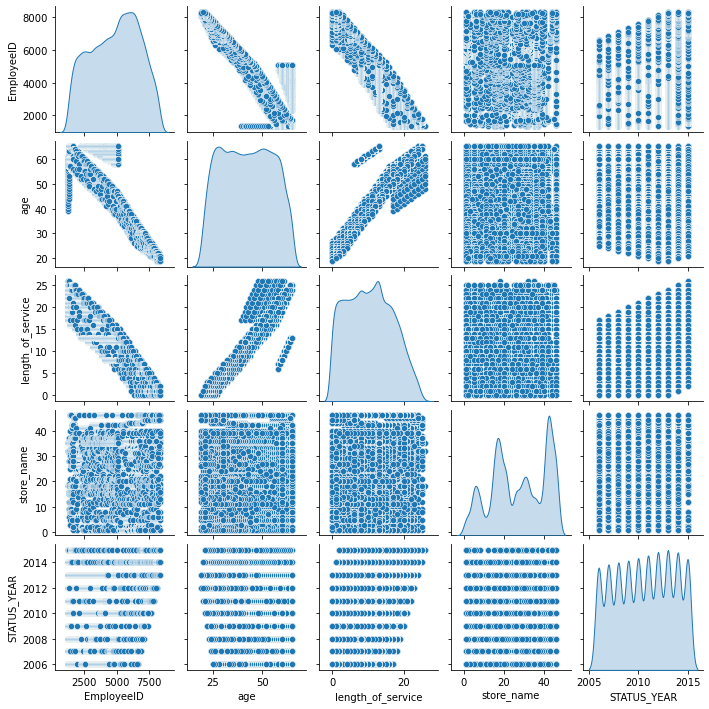

In [12]:
plt.figure(figsize=[10,10])
sns.pairplot(df,diag_kind='kde',height=2);

- from this graph we have only one correlation between age & length_of_service

####  What is the kind of correlation between age & length_of_service?

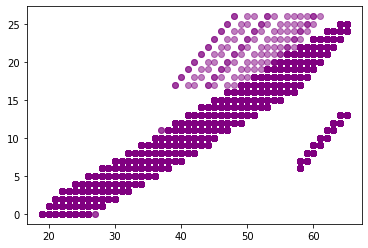

In [13]:
plt.scatter(df['age'],df['length_of_service'],alpha = 0.5, color='Purple');

- We have strong positive correlation between age and lenght of service

## Data Cleaning

Data cleansing is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

In [14]:
## Change datatype for column to be date

df["recorddate_key"] = pd.to_datetime(df["recorddate_key"])
df["birthdate_key"] = pd.to_datetime(df["birthdate_key"])
df["orighiredate_key"] = pd.to_datetime(df["orighiredate_key"])
df["terminationdate_key"] = pd.to_datetime(df["terminationdate_key"])

df['EmployeeID'] = df['EmployeeID'].apply(str)   #Change datatype for column to be string


In [15]:
df.info()  # Make sure of that  datatype changed correctly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   EmployeeID           49653 non-null  object        
 1   recorddate_key       49653 non-null  datetime64[ns]
 2   birthdate_key        49653 non-null  datetime64[ns]
 3   orighiredate_key     49653 non-null  datetime64[ns]
 4   terminationdate_key  49653 non-null  datetime64[ns]
 5   age                  49653 non-null  int64         
 6   length_of_service    49653 non-null  int64         
 7   city_name            49653 non-null  object        
 8   department_name      49653 non-null  object        
 9   job_title            49653 non-null  object        
 10  store_name           49653 non-null  int64         
 11  gender_short         49653 non-null  object        
 12  gender_full          49653 non-null  object        
 13  termreason_desc      49653 non-

In [16]:
df['job_title'].unique()     # Look at full list of unique job titles and frequency

array(['CEO', 'VP Stores', 'Legal Counsel', 'VP Human Resources',
       'VP Finance', 'Exec Assistant, VP Stores',
       'Exec Assistant, Legal Counsel', 'CHief Information Officer',
       'Store Manager', 'Meats Manager',
       'Exec Assistant, Human Resources', 'Exec Assistant, Finance',
       'Director, Recruitment', 'Director, Training',
       'Director, Labor Relations', 'Director, HR Technology',
       'Director, Employee Records', 'Director, Compensation',
       'Corporate Lawyer', 'Produce Manager',
       'Director, Accounts Receivable', 'Bakery Manager',
       'Systems Analyst', 'Director, Accounts Payable', 'Director, Audit',
       'Director, Accounting', 'Director, Investments', 'Dairy Person',
       'Recruiter', 'Processed Foods Manager', 'Customer Service Manager',
       'Trainer', 'Meat Cutter', 'Labor Relations Analyst',
       'Dairy Manager', 'HRIS Analyst', 'Benefits Admin',
       'Compensation Analyst', 'Accounts Receiveable Clerk',
       'Accounts Pay

In [17]:
df.job_title.value_counts()

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Bakery Manager                      285
Meats Manager                       285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Labor Relations Analyst              30
Accounts Receiveable Clerk           30
Trainer                              26
Accounts Payable Clerk               25
Auditor                              20
Systems Analyst                      20
Investment Analyst                   20
Compensation Analyst                 20
Corporate Lawyer                     17


- Now we create new categories for job titles

In [18]:
# The 47 jobs can be separated according to corporate hierarchy
# Use employee, manager, and combined executives and board 
employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

executive = ['Exec Assistant, Finance', 'Exec Assistant, Legal Counsel',
             'CHief Information Officer', 'CEO', 'Exec Assistant, Human Resources',
             'Exec Assistant, VP Stores']

board = ['VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance',
         'Director, Accounts Receivable', 'Director, Accounting',
         'Director, Employee Records', 'Director, Accounts Payable',
         'Director, HR Technology', 'Director, Investments',
         'Director, Labor Relations', 'Director, Audit', 'Director, Training', 'Director, Compensation']


# Check all jobs were entered into the categories
total = len(employee) + len(manager) + len(executive) + len(board)
print('Total jobs categorised:', total, 'out of 47')

Total jobs categorised: 47 out of 47


In [19]:
# Make a copy of job titles in a new column
df['Hierarchy'] = df.job_title

# Replace the job titles in Hierarchy
# The corporate hierarchy intrinsically has order from small to large, 
# so ordinal numbers may be used
df.Hierarchy = df.Hierarchy.replace(employee, 0)
df.Hierarchy = df.Hierarchy.replace(manager, 1)
df.Hierarchy = df.Hierarchy.replace(executive, 2)
df.Hierarchy = df.Hierarchy.replace(board, 3)

# Check that the replacement went to plan
df.Hierarchy.value_counts()

0    47739
1     1749
3      105
2       60
Name: Hierarchy, dtype: int64

In [20]:
df['department_name'].unique()     # Look at full list of unique department_name and frequency

array(['Executive', 'Store Management', 'Meats', 'Recruitment',
       'Training', 'Labor Relations', 'HR Technology', 'Employee Records',
       'Compensation', 'Legal', 'Produce', 'Accounts Receiveable',
       'Bakery', 'Information Technology', 'Accounts Payable', 'Audit',
       'Accounting', 'Investment', 'Dairy', 'Processed Foods',
       'Customer Service'], dtype=object)

In [21]:
df.department_name.value_counts()

Meats                     10269
Dairy                      8599
Produce                    8515
Bakery                     8381
Customer Service           7122
Processed Foods            5911
Store Management            271
Executive                   100
Recruitment                  72
HR Technology                64
Accounting                   59
Employee Records             44
Accounts Receiveable         39
Labor Relations              34
Accounts Payable             34
Training                     30
Compensation                 24
Audit                        24
Investment                   24
Information Technology       20
Legal                        17
Name: department_name, dtype: int64

- Create new categories for department names

In [22]:
# The departments can be separated according to whether they serve the customer or the business

serve_cus = ['Meats', 'Dairy', 'Produce', 'Bakery', 'Customer Service', 'Processed Foods']

serve_biz = ['Store Management', 'Executive', 'Recruitment', 'HR Technology',
             'Accounting', 'Employee Records', 'Accounts Receiveable',
             'Accounts Payable', 'Labor Relations', 'Training', 'Compensation',
             'Audit', 'Investment', 'Information Technology', 'Legal']

# Check all departments were entered into the categories
total = len(serve_cus) + len(serve_biz)
print('Total departments categorised:', total, 'out of 21')

Total departments categorised: 21 out of 21


In [23]:
# Make a copy of department names in a new column
df['Service_to'] = df.department_name

# Replace the department names in Service_to
df.Service_to = df.Service_to.replace(serve_cus, 'Customer')
df.Service_to = df.Service_to.replace(serve_biz, 'Business')

# Check the replacement went to plan
df.Service_to.value_counts()

Customer    48797
Business      856
Name: Service_to, dtype: int64

In [24]:
# Convert STATUS from string to numerical
df.STATUS = df.STATUS.map({'ACTIVE':1, 'TERMINATED':0})

In [25]:
# Separate data to avoid one excessively overlapping the other in plots.
# One set for the terminated (out of company) and working (in company)
out_of_co = df[df.STATUS == 0]
in_co = df[df.STATUS == 1]

## Exploratory Data Analysis


Text(0.5, 1.0, 'In company')

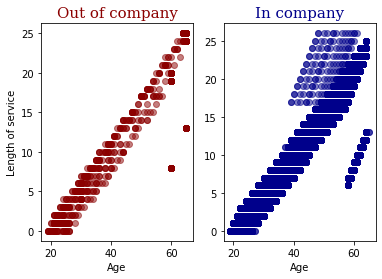

In [26]:
# Start with a broad look at each group in terms of age and length of service
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(out_of_co.age, out_of_co.length_of_service, color='DarkRed',alpha = 0.5)
ax1.set_xlabel('Age')
ax1.set_ylabel('Length of service')
ax1.set_title('Out of company',family='serif',fontsize = 15,color='DarkRed')

ax2.scatter(in_co.age, in_co.length_of_service, color='DarkBlue',alpha = 0.5)
ax2.set_xlabel('Age')
ax2.set_title('In company',family='serif',fontsize = 15,color='DarkBlue')

- People may leave the company after working for any length of time from 0 to 25 years and any age from 20 to 60. Take a closer look at the distribution of ages and service times for terminations.

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


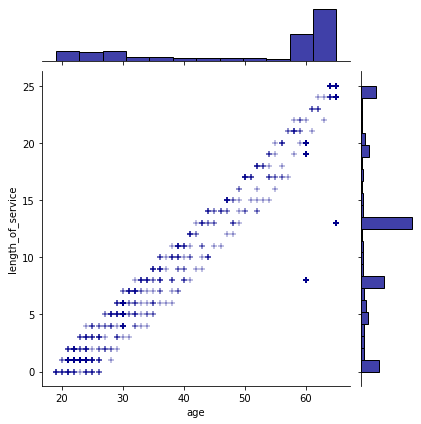

In [27]:
# Scatter plot of out of company dataset, with histograms of the axes
g = sns.jointplot(out_of_co.age, out_of_co.length_of_service, color='DarkBlue',marker = '+')


There appear to be 3 peaks in the age when people stop working. There are 4 major peaks in the length of service before people stop working.

1- The largest age peak of above 60 years old overlaps the service peak of 25 years. This would be people who are retiring from the work force.

2-The second largest age peak of 20-25 years old overlaps the service peak of 0 years. This is likely people who are trying jobs to find something they would like.

3- The third age peak of 29-34 overlaps the service peak of 8 years. This is likely people who have become tired of their work and want a career change. It may also be people who have family commitments that force them to change.

we have 2 employees 60 and 65 years and the lenght of service Less than the rest of the employees of the same age, It could mean that they didn't get a job until much later 

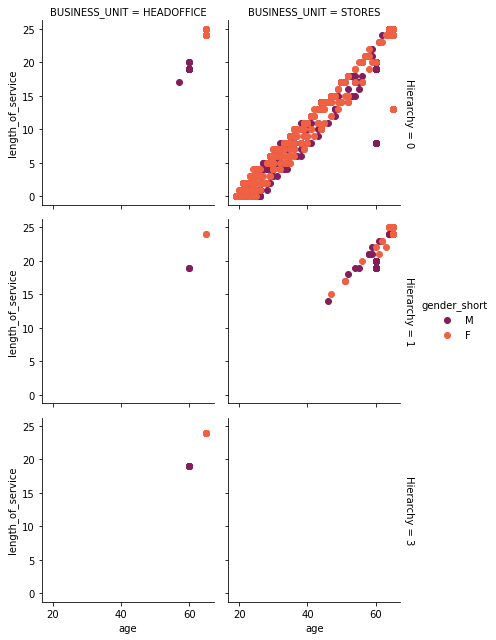

In [28]:
# When someone leaves the company, look at their age, length of service, business unit,
# and position in hierarchy. Separated by gender
g = sns.FacetGrid(out_of_co, col='BUSINESS_UNIT', row='Hierarchy', palette='rocket', 
                  hue='gender_short', margin_titles=True)
g = (g.map(plt.scatter, 'age', 'length_of_service').add_legend())

Nobody has stopped employment when they were at executive level.

There does not appear to be a major difference in employment termination between males and females.

Managers and board members stop employment after at least 14 years of service. This means that they were likely internally promoted to those positions.


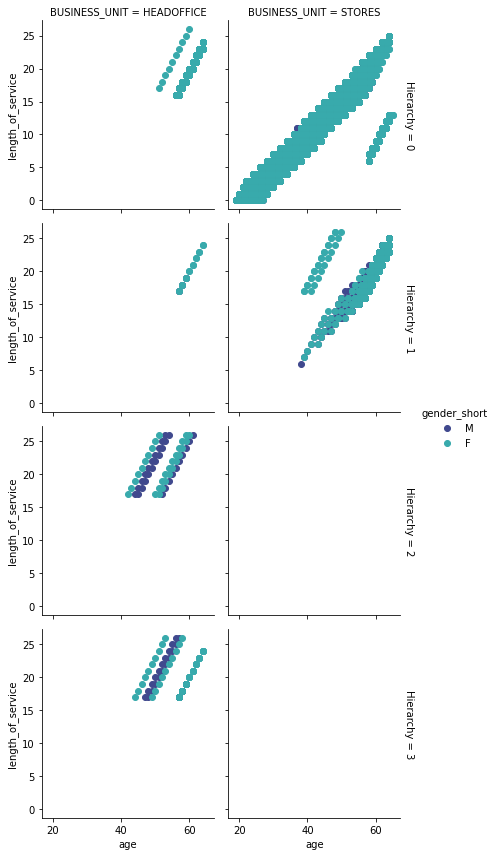

In [29]:
g = sns.FacetGrid(in_co, col='BUSINESS_UNIT', row='Hierarchy', palette='mako', 
                  hue='gender_short', margin_titles=True)
g = (g.map(plt.scatter, 'age', 'length_of_service').add_legend())

Executives and board members only work in head office.

In [30]:
x=df.groupby(["gender_short","STATUS"]).count() # Count each gender who in company or out of company
x.head()

# One set for the (out of company) the status=0
#and working (in company) the status=1

EmployeeID  recorddate_key  birthdate_key  \
gender_short STATUS                                              
F            0              915             915            915   
             1            24983           24983          24983   
M            0              570             570            570   
             1            23185           23185          23185   

                     orighiredate_key  terminationdate_key    age  \
gender_short STATUS                                                 
F            0                    915                  915    915   
             1                  24983                24983  24983   
M            0                    570                  570    570   
             1                  23185                23185  23185   

                     length_of_service  city_name  department_name  job_title  \
gender_short STATUS                                                             
F            0                     915        915              915        915   
             1                   24983      24983            24983      24983   
M            0                     570        570              570        570   
             1                   23185      23185            23185      23185   

                     store_name  gender_full  termreason_desc  termtype_desc  \
gender_short STATUS                                                            
F            0              915          915              915            915   
             1            24983        24983            24983          24983   
M            0              570          570              570            570   
             1            23185        23185            23185          23185   

                     STATUS_YEAR  BUSINESS_UNIT  Hierarchy  Service_to  
gender_short STATUS                                                     
F            0               915            915        915         915  
             1             24983          24983      24983       24983  
M            0               570            570        570         570  
             1             23185          23185      23185       23185

It is noticeable that the percentage of females exceeds the percentage of males work in company and also in out of company

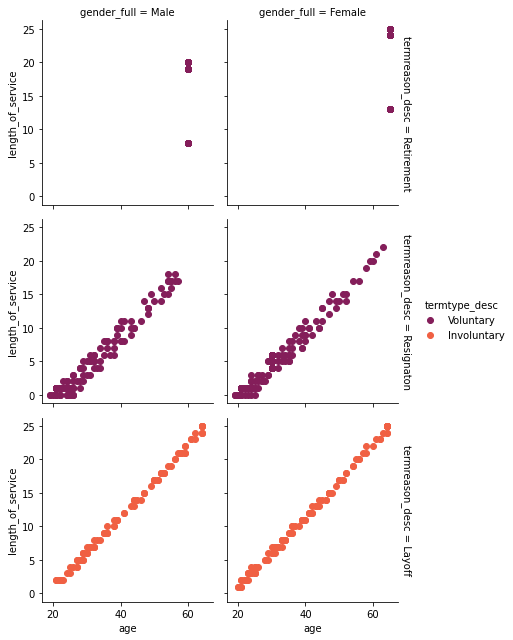

In [31]:
# Out of interest, look at when termination is voluntary or involuntary
g = sns.FacetGrid(out_of_co, col='gender_full', row='termreason_desc', palette='rocket', 
                  hue='termtype_desc', margin_titles=True)
g = (g.map(plt.scatter, 'age', 'length_of_service').add_legend())

Layoffs occur for all ages and all service lengths either male or female.

As expected, layoffs are involuntary, whereas resignations and retirements are voluntary.


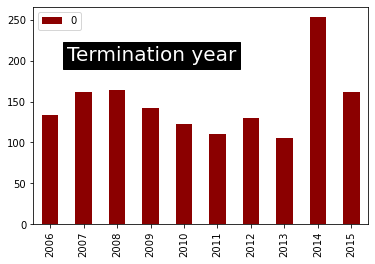

In [32]:
# Out of interest, look at number of terminations per year.
# Count terminations per year
term_per_year = Counter(out_of_co.STATUS_YEAR)
term_per_year_df = pd.DataFrame.from_dict(term_per_year, orient='index')
term_per_year_df = term_per_year_df.sort_index()
term_per_year_df.plot(kind='bar',color = 'DarkRed')
plt.text(0.5,200,'Termination year',fontsize = 20,backgroundcolor = 'k',color = 'white'); # x and y position of start of text

2014 had an unusually high number of employment terminations.

In [33]:
# Preprocessing for machine learning models

# Drop the employee ID, record date, birth date, termination date, termination reason, 
# termination type, gender_full, STATUS_YEAR,city_name and store_name features
# Also drop job_title (replaced with Hierarchy), department_name (replaced with Service_to),
drop_cols = ['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
             'terminationdate_key', 'gender_full', 'termreason_desc',
             'termtype_desc', 'STATUS_YEAR','city_name', 'store_name', 'job_title', 'department_name']

df = df.drop(drop_cols, axis=1)

In [34]:
# The gender, business unit and Service_to categories are nominal, so they will
# be exploded instead of being converted to ordinal values
dummy_cols = ['gender_short', 'BUSINESS_UNIT', 'Service_to']
df = pd.get_dummies(df, columns=dummy_cols)

In [35]:
# Separate the label from the dataset
label = df.STATUS
df = df.drop('STATUS', axis=1)

In [36]:
# Machine learning classification models

# Only age and length of service have double digit values. It should be okay to
# leave the values at their normal scales.

# Split data for training and testing. Specify random state for repeatability.
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3)

In [37]:
# KNN
model = KNeighborsClassifier()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print('KNN model score is %0.4f' %score)

KNN model score is 0.9863


In [38]:
# Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print('Random Forest model score is %0.4f' %score)

Random Forest model score is 0.9866


End
Using default parameters for the K-Nearest Neighbours model and the Random Forest model produce scores around 0.98, which is good.